In [4]:
!pip install opencv-python

In [7]:
!pip uninstall -y numpy opencv-python
!pip install numpy opencv-python


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88


You can safely remove it manually.


     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------- ------------------------- 20.5/60.9 kB 72.6 kB/s eta 0:00:01
     ------------- ------------------------- 20.5/60.9 kB 72.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.9 kB 115.5 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.9 kB 130.9 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 154.4 kB/s eta 0:00:00
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cache

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.6 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.6 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.6 which is incompatible.


In [12]:
pip install numpy==1.26.4 --force-reinstall


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------- ------------------------- 20.5/61.0 kB 65.2 kB/s eta 0:00:01
     ------------------- ------------------- 30.7/61.0 kB 87.1 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 115.5 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 130.9 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 147.7 kB/s eta 0:00:00
   -----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [14]:
import numpy as np
import cv2

print("NumPy version:", np.__version__)
print("OpenCV version:", cv2.__version__)


NumPy version: 1.26.4
OpenCV version: 4.12.0


In [20]:
import cv2
import os
import time

# === CONFIGURATION ===
IMAGE_FOLDER = r"C:\Users\Pranav\OneDrive\Desktop\FDIP\images"              # Folder where your images are stored
OUTPUT_VIDEO = "slideshow_output.avi"  # Output file name
FRAME_WIDTH = 800
FRAME_HEIGHT = 600
FPS = 30                             # Frames per second
DISPLAY_SECONDS = 2                  # Display time for each image
TRANSITION_FRAMES = 30               # Frames for crossfade

def load_images(folder):
    """Load and resize images from a folder"""
    image_files = sorted([
        f for f in os.listdir(folder)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    images = []
    for file in image_files:
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            resized = cv2.resize(img, (FRAME_WIDTH, FRAME_HEIGHT))
            images.append(resized)
    return images

def create_slideshow(images):
    """Create video slideshow with transitions"""
    if len(images) < 2:
        print("At least two images are needed to create a slideshow.")
        return

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, FPS, (FRAME_WIDTH, FRAME_HEIGHT))

    for i in range(len(images) - 1):
        current = images[i]
        next_img = images[i + 1]

        # Show current image for DISPLAY_SECONDS
        for _ in range(FPS * DISPLAY_SECONDS):
            out.write(current)

        # Crossfade transition
        for t in range(1, TRANSITION_FRAMES + 1):
            alpha = t / TRANSITION_FRAMES
            beta = 1.0 - alpha
            blended = cv2.addWeighted(current, beta, next_img, alpha, 0)
            out.write(blended)

    # Show last image
    for _ in range(FPS * DISPLAY_SECONDS):
        out.write(images[-1])

    out.release()
    print(f"Slideshow saved to: {OUTPUT_VIDEO}")

if __name__ == "__main__":
    imgs = load_images(IMAGE_FOLDER)
    if not imgs:
        print("No images found in folder:", IMAGE_FOLDER)
    else:
        create_slideshow(imgs)


Slideshow saved to: slideshow_output.avi


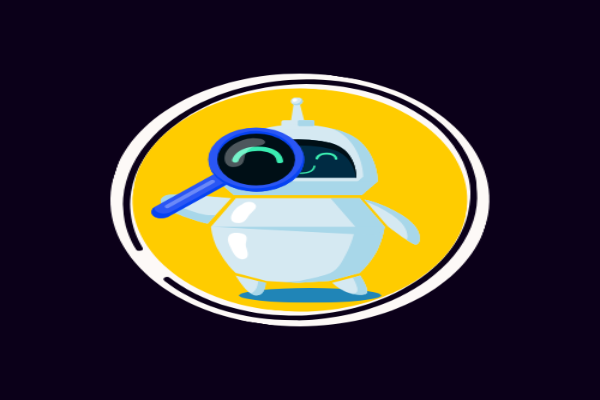

In [25]:
import cv2
import os
import numpy as np
from IPython.display import display, clear_output
from PIL import Image
import time

# === CONFIG ===
IMAGE_FOLDER = r"C:\Users\Pranav\OneDrive\Desktop\FDIP\images"# Folder containing images
DISPLAY_TIME = 2               # Seconds per image
TRANSITION_FRAMES = 30         # Crossfade frame count
FRAME_WIDTH, FRAME_HEIGHT = 600, 400  # Resize all images to same size

def load_images(folder):
    """Load and resize all images from a folder"""
    files = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    images = []
    for f in files:
        img = cv2.imread(os.path.join(folder, f))
        if img is not None:
            resized = cv2.resize(img, (FRAME_WIDTH, FRAME_HEIGHT))
            images.append(resized)
    return images

def show_frame(img_bgr):
    """Convert BGR to RGB and display using IPython"""
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))
    time.sleep(1 / 30)  # simulate frame rate
    clear_output(wait=True)

def display_slideshow(images):
    if len(images) < 2:
        print("Need at least 2 images.")
        return

    for i in range(len(images) - 1):
        current = images[i]
        next_img = images[i + 1]

        # Show current image for DISPLAY_TIME seconds
        for _ in range(DISPLAY_TIME * 30):  # assuming 30 FPS
            show_frame(current)

        # Crossfade transition
        for t in range(1, TRANSITION_FRAMES + 1):
            alpha = t / TRANSITION_FRAMES
            beta = 1.0 - alpha
            blended = cv2.addWeighted(current, beta, next_img, alpha, 0)
            show_frame(blended)

    # Show final image
    for _ in range(DISPLAY_TIME * 30):
        show_frame(images[-1])

# === Run it ===
imgs = load_images(IMAGE_FOLDER)
display_slideshow(imgs)
